<a href="https://colab.research.google.com/github/merdogan97/Machine-Learning-ML-/blob/main/Assignment2_Heart_Stroke_Prediction_12_05_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# **Import esential Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

# **Ingest the data to notebook**

In [3]:
df = pd.read_csv('/content/heart.csv') 

# **EDA**

# **Data Preprocessing**

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
23,61,1,2,150,243,1,1,137,1,1.000,1,0,2,1
30,41,0,1,105,198,0,1,168,0,0.000,2,1,2,1
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
179,57,1,0,150,276,0,0,112,1,0.600,1,1,1,0
302,57,0,1,130,236,0,0,174,0,0.000,1,1,2,0
275,52,1,0,125,212,0,1,168,0,1.000,2,2,3,0
167,62,0,0,140,268,0,0,160,0,3.600,0,2,2,0
29,53,1,2,130,197,1,0,152,0,1.200,0,0,2,1
39,65,0,2,160,360,0,0,151,0,0.800,2,0,2,1
75,55,0,1,135,250,0,0,161,0,1.400,1,0,2,1


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

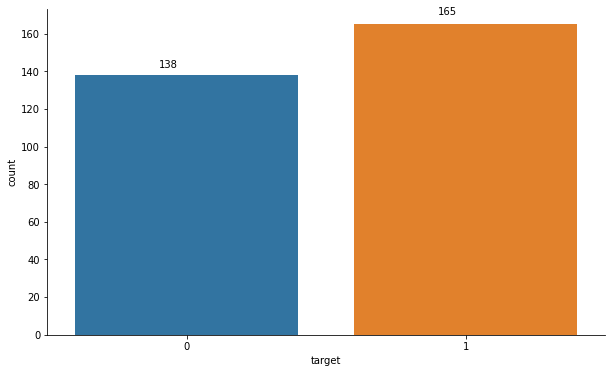

In [10]:
ax = sns.countplot(df['target'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

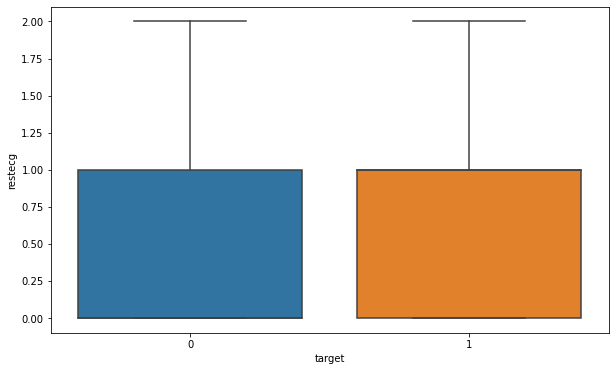

In [11]:
sns.boxplot(x='target',y='restecg',data=df);

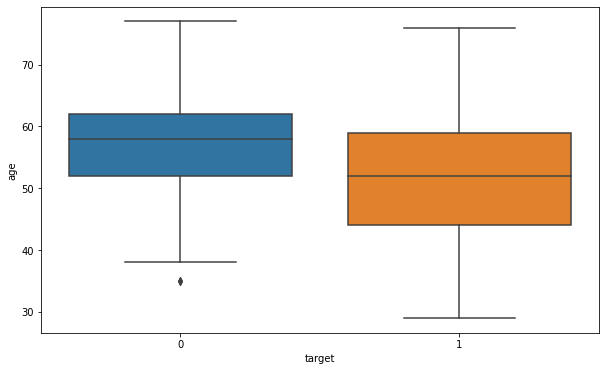

In [12]:
sns.boxplot(x='target',y='age',data=df);

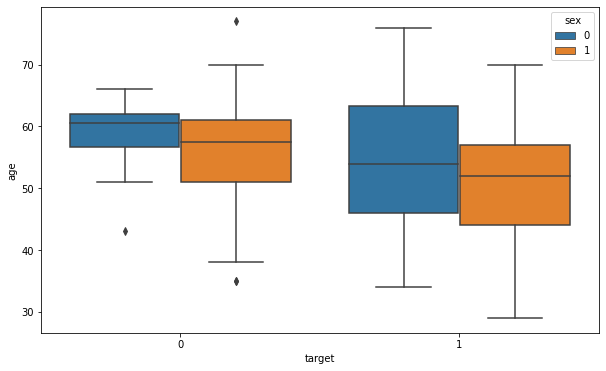

In [13]:
sns.boxplot(x='target',y='age',hue='sex', data=df);

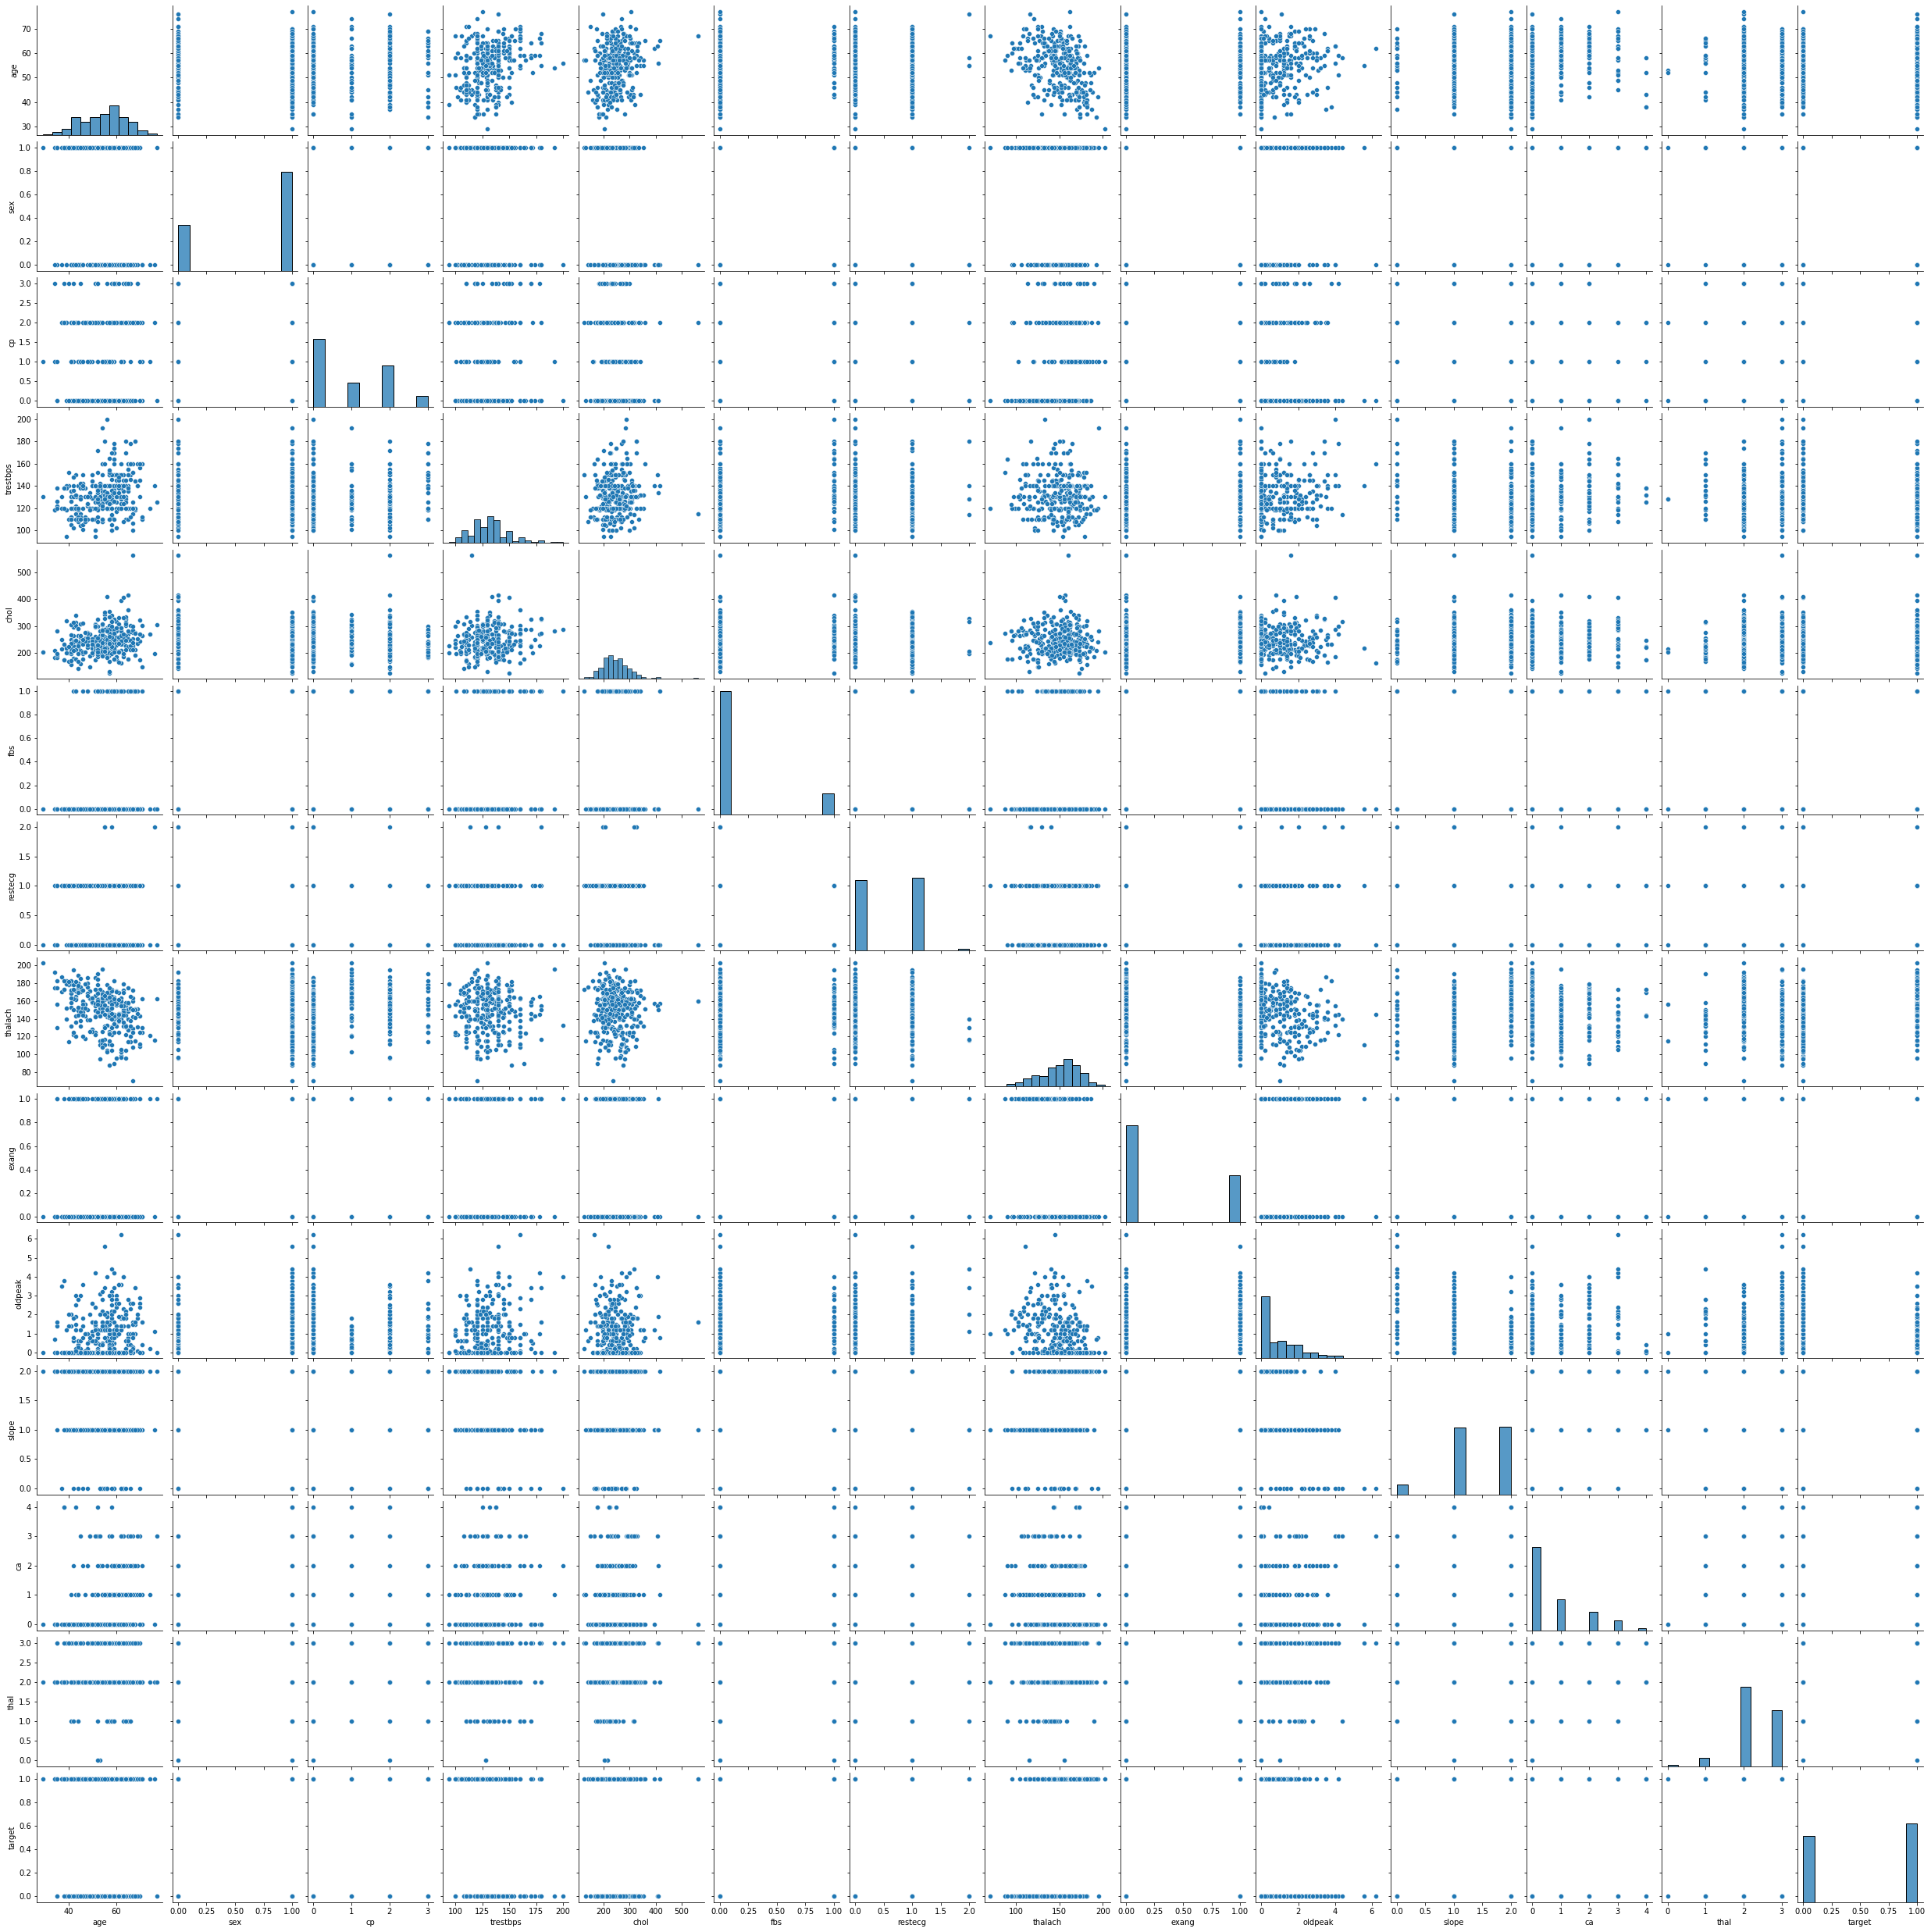

In [14]:
sns.pairplot(df)

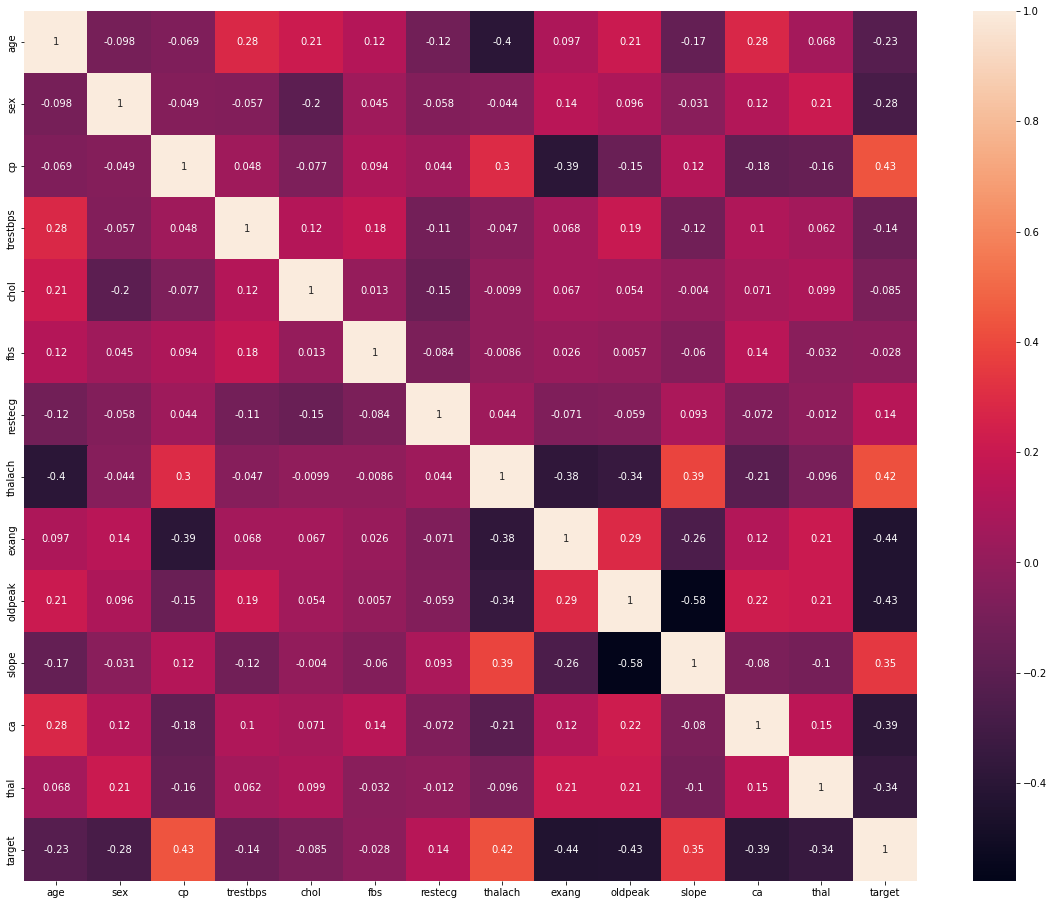

In [15]:
plt.figure(figsize=(20,16)) 
sns.heatmap(df.corr(), annot=True)

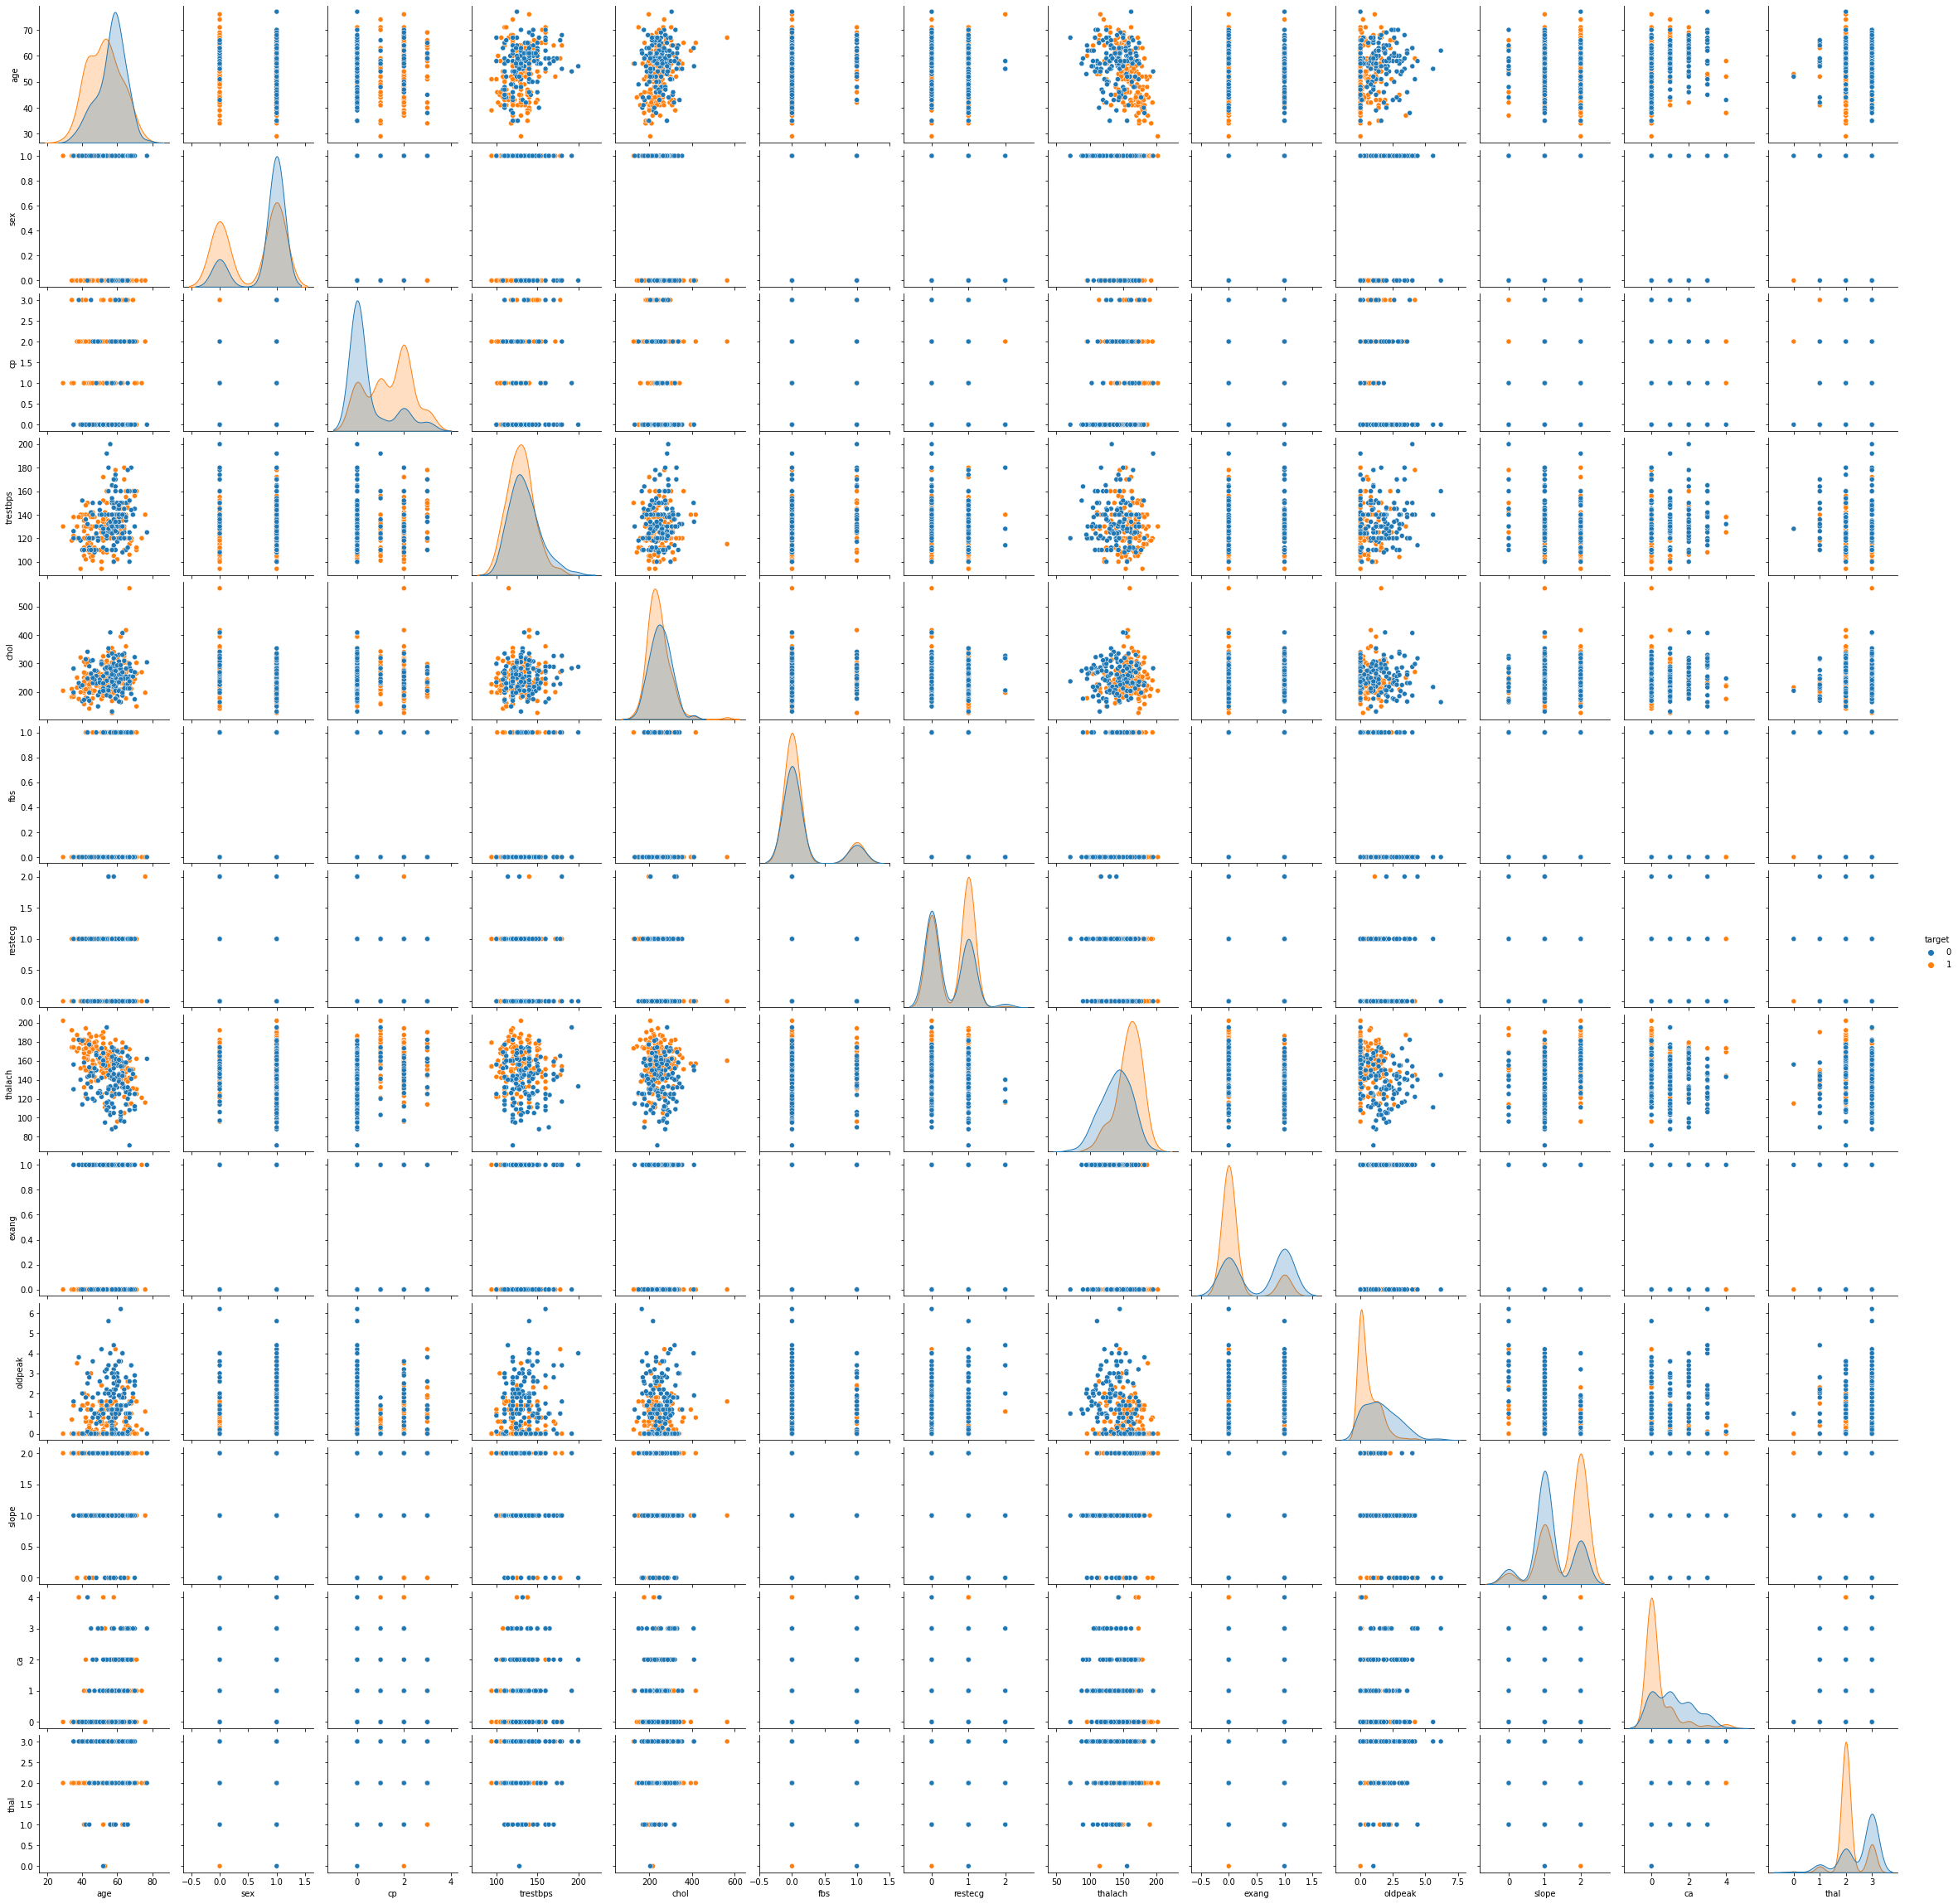

In [16]:
sns.pairplot(df,hue='target');

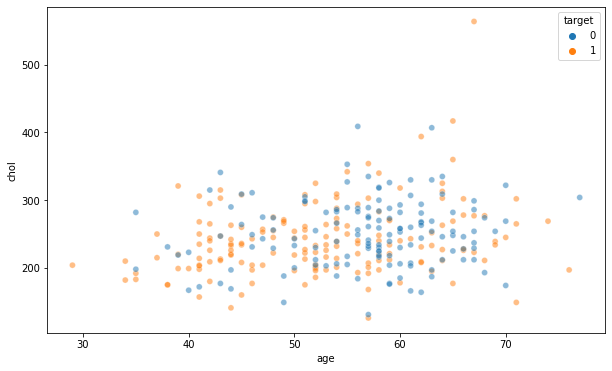

In [17]:
sns.scatterplot(x='age', y='chol', data=df, hue='target', alpha=0.5);

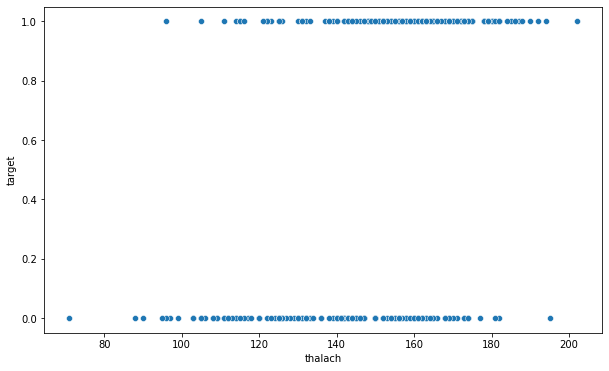

In [18]:
sns.scatterplot(x='thalach',y='target',data=df);

# **Implement Logistic Regression and Evaluate**

# **Train | Test Split and Scaling**

In [19]:
X = df.drop('target',axis=1)
y = df['target']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 86 to 11
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 26.5 KB


In [23]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 221 to 153
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     int64  
 1   sex       61 non-null     int64  
 2   cp        61 non-null     int64  
 3   trestbps  61 non-null     int64  
 4   chol      61 non-null     int64  
 5   fbs       61 non-null     int64  
 6   restecg   61 non-null     int64  
 7   thalach   61 non-null     int64  
 8   exang     61 non-null     int64  
 9   oldpeak   61 non-null     float64
 10  slope     61 non-null     int64  
 11  ca        61 non-null     int64  
 12  thal      61 non-null     int64  
dtypes: float64(1), int64(12)
memory usage: 6.7 KB


In [24]:
y_train

86     1
260    0
78     1
150    1
262    0
      ..
40     1
75     1
87     1
63     1
11     1
Name: target, Length: 242, dtype: int64

In [25]:
y_test

221    0
8      1
89     1
154    1
201    0
      ..
202    0
48     1
255    0
178    0
153    1
Name: target, Length: 61, dtype: int64

In [26]:
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Modelling**

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_model = LogisticRegression()

In [30]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [31]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0


In [32]:
log_model.coef_

array([[-0.08725068, -0.6417029 ,  0.89809385, -0.31557464, -0.24248918,
         0.09299338,  0.18864842,  0.3933351 , -0.47994438, -0.47415917,
         0.42376881, -0.82516775, -0.5581558 ]])

In [33]:
log_model.intercept_

array([0.24819849])

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [35]:
y_pred= log_model.predict(X_test_scaled) # 31 adet test sayısı kadar, herbir data için testi geçer/kalır diye predict yaptı.
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [36]:
y_pred_proba = log_model.predict_proba(X_test_scaled) 
y_pred_proba                  # 0 ve 1 için verdiği olasılıksal oranlardır. Hangisinin olasılığı yüksekse ona (0 veya 1'e) yuvarlıyor.

array([[0.99459645, 0.00540355],
       [0.15522764, 0.84477236],
       [0.25693359, 0.74306641],
       [0.02374954, 0.97625046],
       [0.98174361, 0.01825639],
       [0.11081562, 0.88918438],
       [0.05751249, 0.94248751],
       [0.98592779, 0.01407221],
       [0.960748  , 0.039252  ],
       [0.16562719, 0.83437281],
       [0.97003167, 0.02996833],
       [0.23679849, 0.76320151],
       [0.94991998, 0.05008002],
       [0.59713932, 0.40286068],
       [0.07603945, 0.92396055],
       [0.18632361, 0.81367639],
       [0.01292489, 0.98707511],
       [0.24909519, 0.75090481],
       [0.15253405, 0.84746595],
       [0.99074853, 0.00925147],
       [0.99107583, 0.00892417],
       [0.32351429, 0.67648571],
       [0.32238315, 0.67761685],
       [0.28572102, 0.71427898],
       [0.58211298, 0.41788702],
       [0.03292785, 0.96707215],
       [0.98029134, 0.01970866],
       [0.21517323, 0.78482677],
       [0.97039574, 0.02960426],
       [0.94742646, 0.05257354],
       [0.

# **X_test + y_yest + y_pred + y_pred_proba**

In [37]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
221,55,1,0,140,217,0,1,111,1,5.600,0,0,3,0
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1
89,58,0,0,100,248,0,0,122,0,1.000,1,0,2,1
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1
201,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,58,1,0,150,270,0,0,111,1,0.800,2,0,3,0
48,53,0,2,128,216,0,0,115,0,0.000,2,0,0,1
255,45,1,0,142,309,0,0,147,1,0.000,1,3,3,0
178,43,1,0,120,177,0,0,120,1,2.500,1,0,3,0


In [38]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba
221,55,1,0,140,217,0,1,111,1,5.600,0,0,3,0,0.005
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1,0.845
89,58,0,0,100,248,0,0,122,0,1.000,1,0,2,1,0.743
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1,0.976
201,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,58,1,0,150,270,0,0,111,1,0.800,2,0,3,0,0.064
48,53,0,2,128,216,0,0,115,0,0.000,2,0,0,1,0.995
255,45,1,0,142,309,0,0,147,1,0.000,1,3,3,0,0.009
178,43,1,0,120,177,0,0,120,1,2.500,1,0,3,0,0.057


In [39]:
test_data["pred"] = y_pred
test_data                               # Hangisinin olasılığı yüksekse ona (0 veya 1'e) yuvarlıyor.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
221,55,1,0,140,217,0,1,111,1,5.600,0,0,3,0,0.005,0
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1,0.845,1
89,58,0,0,100,248,0,0,122,0,1.000,1,0,2,1,0.743,1
154,39,0,2,138,220,0,1,152,0,0.000,1,0,2,1,0.976,1
201,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0,0.018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,58,1,0,150,270,0,0,111,1,0.800,2,0,3,0,0.064,0
48,53,0,2,128,216,0,0,115,0,0.000,2,0,0,1,0.995,1
255,45,1,0,142,309,0,0,147,1,0.000,1,3,3,0,0.009,0
178,43,1,0,120,177,0,0,120,1,2.500,1,0,3,0,0.057,0


In [40]:
test_data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_proba,pred
211,61,1,0,120,260,0,1,140,1,3.600,1,1,3,0,0.020,0
201,60,1,0,125,258,0,0,141,1,2.800,1,1,3,0,0.018,0
170,56,1,2,130,256,1,0,142,1,0.600,1,1,1,0,0.678,1
209,59,1,0,140,177,0,1,162,1,0.000,2,1,3,0,0.210,0
133,41,1,1,110,235,0,1,153,0,0.000,2,0,2,1,0.930,1


# **Model Performance on Classification Tasks**
# **Evaluation**

In [41]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [42]:
accuracy_score(y_test,y_pred)         # Ne kadar doğru söylediği önemli. TP ve TN'lerin doğru çıkması lazım !!!

0.8360655737704918

In [43]:
log_model.score(X_test_scaled, y_test)          # bu şekilde de elde edilebilir.

0.8360655737704918

In [44]:
precision_score(y_test, y_pred)

0.7777777777777778

In [45]:
recall_score(y_test, y_pred)

0.9333333333333333

In [46]:
f1_score(y_test,y_pred)

0.8484848484848485

# **Confusion Matrix**

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [48]:
confusion_matrix(y_test,y_pred)

array([[23,  8],
       [ 2, 28]])

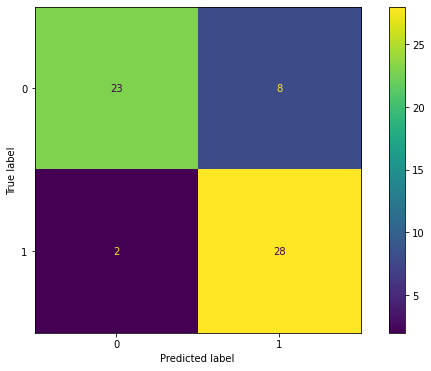

In [49]:
plot_confusion_matrix(log_model, X_test_scaled, y_test); # TP:28, FN:23

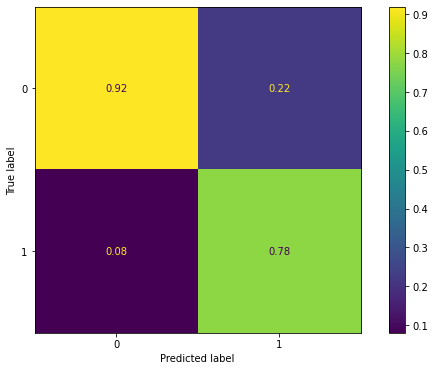

In [50]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



In [52]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       107
           1       0.83      0.91      0.87       135

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.84       242
weighted avg       0.85      0.84      0.84       242



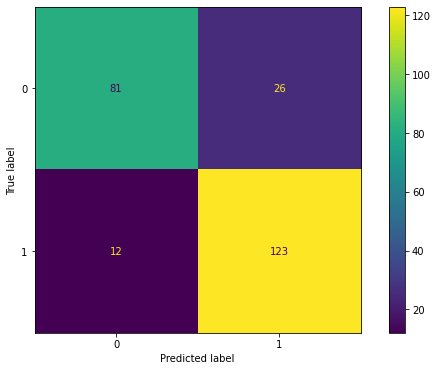

In [53]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

# **Cross Validation**

In [54]:
from sklearn.model_selection import cross_validate

In [55]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [56]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.009,0.008,0.840,0.857,0.857,0.857
2,0.008,0.004,0.800,0.800,0.857,0.828
3,0.005,0.004,0.833,0.812,0.929,0.867
4,0.004,0.003,0.708,0.706,0.857,0.774
5,0.004,0.003,0.875,0.923,0.857,0.889
6,0.004,0.003,0.833,0.846,0.846,0.846
7,0.005,0.004,0.792,0.786,0.846,0.815
8,0.004,0.004,0.625,0.643,0.692,0.667
9,0.004,0.003,0.875,0.857,0.923,0.889
10,0.004,0.004,0.958,1.000,0.923,0.960


In [57]:
df_scores.mean()[2:]

test_accuracy    0.814
test_precision   0.823
test_recall      0.859
test_f1          0.839
dtype: float64

In [58]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61

Train Set

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       107
           1       0.83      0.91      0.87       135

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.84       242
weighted avg       0.85      0.84      0.84       242



# **ROC (Receiver Operating Curve) and AUC (Area Under Curve)**

In [59]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

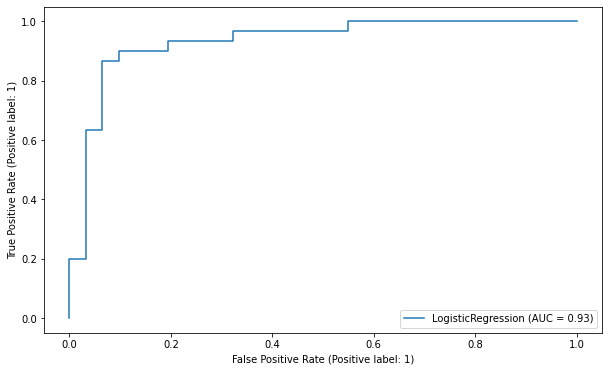

In [60]:
plot_roc_curve(log_model, X_test_scaled, y_test);

In [61]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.932258064516129

In [62]:
roc_auc_score(y_test, y_pred)

0.8376344086021505

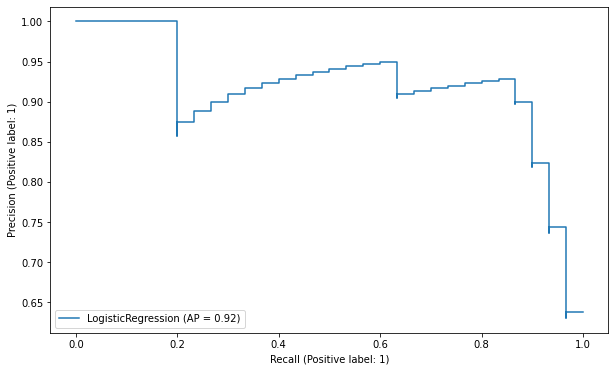

In [63]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

# **Implement KNN and Evaluate**

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_model.fit(X_train_scaled,y_train)

In [68]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [69]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [65]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.995,0.005
1,0.155,0.845
2,0.257,0.743
3,0.024,0.976
4,0.982,0.018
...,...,...
56,0.936,0.064
57,0.005,0.995
58,0.991,0.009
59,0.943,0.057


In [70]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [71]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
224,0,0,0.000,1.000
209,0,0,0.200,0.800
255,0,0,0.000,1.000
176,0,0,0.200,0.800
268,0,0,0.000,1.000
12,1,1,1.000,0.000
65,1,1,1.000,0.000
16,1,1,1.000,0.000
170,0,1,0.600,0.400
228,0,0,0.400,0.600


# **Elbow Method for Choosing Reasonable K Values**

In [72]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [95]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)
    

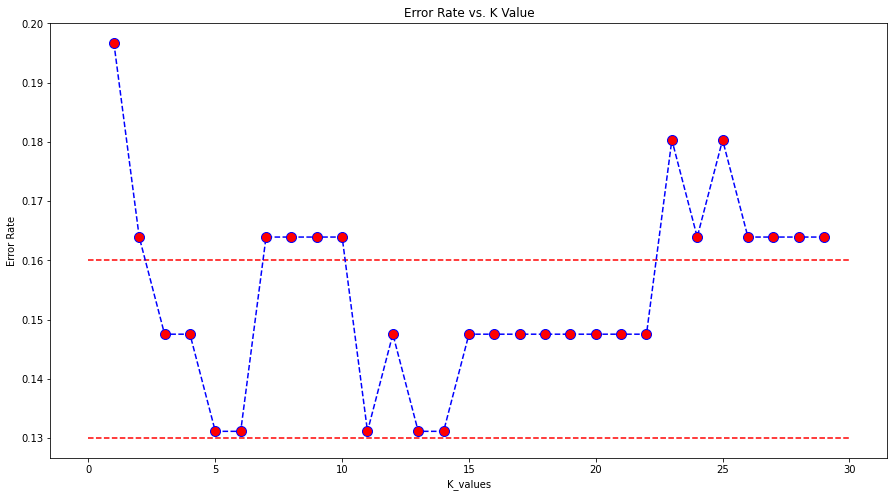

In [96]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.13, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.16, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

# **Scores by Various K Values**

In [115]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [114]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[23  8]
 [ 4 26]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        31
           1       0.76      0.87      0.81        30

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set

[[107   0]
 [  0 135]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       135

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [113]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_scaled,y_train)
print('WITH K=10\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=10

Test_Set

[[26  5]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.83      0.83      0.83        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Train_Set

[[ 88  19]
 [ 16 119]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       107
           1       0.86      0.88      0.87       135

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



In [112]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=15\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=15

Test_Set

[[24  7]
 [ 2 28]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61


Train_Set

[[ 84  23]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       107
           1       0.84      0.93      0.88       135

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.86      0.86       242



In [116]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=22

Test_Set

[[23  8]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.87        30

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61


Train_Set

[[ 79  28]
 [  9 126]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       107
           1       0.82      0.93      0.87       135

    accuracy                           0.85       242
   macro avg       0.86      0.84      0.84       242
weighted avg       0.85      0.85      0.84       242



# **Cross Validate For Optimal K Value**

In [79]:
from sklearn.model_selection import cross_val_score, cross_validate

In [117]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.003,0.010,0.840,0.857,0.857,0.857
2,0.001,0.005,0.720,0.733,0.786,0.759
3,0.001,0.004,0.833,0.812,0.929,0.867
4,0.001,0.004,0.833,0.778,1.000,0.875
5,0.001,0.005,0.792,0.846,0.786,0.815
6,0.002,0.007,0.792,0.786,0.846,0.815
7,0.002,0.006,0.833,0.846,0.846,0.846
8,0.001,0.005,0.708,0.688,0.846,0.759
9,0.002,0.006,0.875,0.857,0.923,0.889
10,0.001,0.004,0.917,0.867,1.000,0.929


In [81]:
df_scores.mean()[2:]

test_accuracy    0.814
test_precision   0.807
test_recall      0.882
test_f1          0.841
dtype: float64

# **Predict New Observation**

In [118]:
new_observation = [[3, 4, 5, 6, 8, 3, 5, 6, 9 ,2 , 3, 5, 9]] 

In [119]:
knn_model.predict(new_observation)

array([0])

In [108]:
knn_model.predict_proba(new_observation)

array([[0.75862069, 0.24137931]])

In [109]:
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-5.5736453 ,  7.06672331,  3.91714267, -7.13466746, -4.48863407,
         7.72105088,  8.41226032, -6.30466381, 18.71422607,  0.85246279,
         2.54587539,  4.13754391, 11.11096658]])

In [110]:
knn_model.predict(new_observation_scaled)

array([0])

In [111]:
knn_model.predict_proba(new_observation_scaled)

array([[0.68965517, 0.31034483]])

# **Gridsearch Method for Choosing Reasonable K Values**

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
knn_grid = KNeighborsClassifier()

In [122]:
k_values= range(1,30)

In [123]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]} # p1 : manhattan p2: Öklid
                                                                                     # uniform:hepsine aynı veriyor,1    distance:farklı ağırlık veriyor

In [124]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')  # binary old. f1 seçilebilir. ya da recall seçebilirsiniz

In [125]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [126]:
knn_grid_model.best_params_  # en ideal parametreler !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

{'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}

In [127]:
print('WITH K=10\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=10

Test_Set

[[26  5]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.83      0.83      0.83        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Train_Set

[[ 88  19]
 [ 16 119]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       107
           1       0.86      0.88      0.87       135

    accuracy                           0.86       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.86      0.86      0.86       242



# **Visually compare models based on your chosen metric**

# **Evaluating ROC Curves and AUC**

In [129]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [138]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

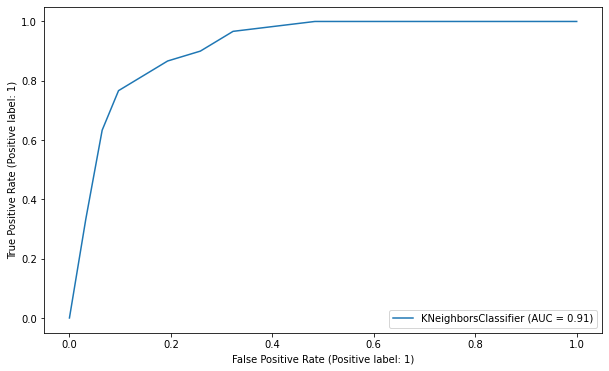

In [139]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [140]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9145161290322581

# **Chose best model and make a random prediction**

# **Final Model and Model Deployment**

In [141]:
import pickle

In [142]:
scaler = StandardScaler()

In [143]:
scaler.fit(X)

StandardScaler()

In [144]:
X_scaled = scaler.transform(X)

In [145]:
final_knn_model = KNeighborsClassifier(n_neighbors=9)

In [146]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

In [147]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

# **Predict New Observations**

In [148]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

In [149]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [150]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [151]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000


In [154]:
df.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
46,44,1,2,140,235,0,0,180,0,0.000,2,0,2,1
262,53,1,0,123,282,0,1,95,1,2.000,1,2,3,0
38,65,0,2,155,269,0,1,148,0,0.800,2,0,2,1
51,66,1,0,120,302,0,0,151,0,0.400,1,0,2,1
292,58,0,0,170,225,1,0,146,1,2.800,1,2,1,0


In [155]:
new_obs = {"age": [50, 45, 60, 55, 52, 45, 56, 60],
           "sex": [1, 0, 0, 1, 1, 0, 0, 1],
           "cp": [1, 3, 2, 1, 2, 3, 2, 0],
           "trestbps": [120, 130,125, 140, 130, 120, 110, 135],
           "chol": [233, 240, 250, 245, 238, 233, 210, 220],
           "fbs": [1, 0, 0, 0, 0, 0, 0, 1],
           "restecg": [1, 1, 0, 0, 0, 1, 1, 0],
           "thalach": [145, 150, 135, 126, 160, 150, 145, 150],
           "exang": [1, 0, 0, 0, 1, 1, 1, 0],
           "oldpeak": [1.800, 2.300, 2.100, 1.500, 2.300, 1.700, 1.800, 2.400],
           "slope": [0, 2, 0, 2, 2, 0, 0, 2],
           "ca": [0, 0, 2, 2, 0, 0, 2, 2],
           "thal": [1, 2, 3, 3, 1, 2, 2, 3],
         
          }

In [156]:
samples = pd.DataFrame(new_obs)
samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,50,1,1,120,233,1,1,145,1,1.800,0,0,1
1,45,0,3,130,240,0,1,150,0,2.300,2,0,2
2,60,0,2,125,250,0,0,135,0,2.100,0,2,3
3,55,1,1,140,245,0,0,126,0,1.500,2,2,3
4,52,1,2,130,238,0,0,160,1,2.300,2,0,1
5,45,0,3,120,233,0,1,150,1,1.700,0,0,2
6,56,0,2,110,210,0,1,145,1,1.800,0,2,2
7,60,1,0,135,220,1,0,150,0,2.400,2,2,3


In [157]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-0.48155814,  0.68100522,  0.03203122, -0.66386682, -0.25633371,
         2.394438  ,  0.89896224, -0.20320974,  1.43548113,  0.65599028,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.03300228, -1.46841752,  1.97312292, -0.09273778, -0.12105533,
        -0.41763453,  0.89896224,  0.01544279, -0.69663055,  1.08733806,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.62133012, -1.46841752,  1.00257707, -0.3783023 ,  0.07219949,
        -0.41763453, -1.00583187, -0.64051479, -0.69663055,  0.91479895,
        -2.27457861,  1.24459328,  1.12302895],
       [ 0.06988599,  0.68100522,  0.03203122,  0.47839125, -0.02442792,
        -0.41763453, -1.00583187, -1.03408933, -0.69663055,  0.39718162,
         0.97635214,  1.24459328,  1.12302895],
       [-0.26098049,  0.68100522,  1.00257707, -0.09273778, -0.1597063 ,
        -0.41763453, -1.00583187,  0.45274783,  1.43548113,  1.08733806,
         0.97635214, -0.71442887, -2.14887271],
       [-1.03300228, -1.468417

In [158]:
loaded_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=9)

In [159]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [160]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred,pred_proba_1,pred_proba_0
0,50,1,1,120,233,1,1,145,1,1.800,0,0,1,0,0.444,0.556
1,45,0,3,130,240,0,1,150,0,2.300,2,0,2,1,1.000,0.000
2,60,0,2,125,250,0,0,135,0,2.100,0,2,3,0,0.222,0.778
3,55,1,1,140,245,0,0,126,0,1.500,2,2,3,0,0.111,0.889
4,52,1,2,130,238,0,0,160,1,2.300,2,0,1,1,0.778,0.222
5,45,0,3,120,233,0,1,150,1,1.700,0,0,2,1,1.000,0.000
6,56,0,2,110,210,0,1,145,1,1.800,0,2,2,1,0.556,0.444
7,60,1,0,135,220,1,0,150,0,2.400,2,2,3,0,0.222,0.778
